# Ultimate Oscillator

[Investopedia link](https://www.investopedia.com/terms/u/ultimateoscillator.asp)

[Stock charts link](https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:ultimate_oscillator)

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

# to fetch data 
import yfinance as yf

import talib as ta

# Importing stock price of Reliance

In [2]:
symbol = 'RELIANCE.NS'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,922.700012,922.700012,907.500000,909.750000,895.929260,4321686
2018-01-02,913.000000,919.549988,906.400024,911.150024,897.308044,4342815
2018-01-03,925.000000,926.000000,913.049988,914.799988,900.902649,6175312
2018-01-04,918.150024,921.799988,915.700012,920.299988,906.319092,4118581
2018-01-05,921.799988,926.900024,920.250000,923.250000,909.224243,3401905


### Applying ultimate oscillator function (built in ta-lib)

In [3]:
df['Ult Osc'] = ta.ULTOSC(df['High'], df['Low'], df['Close'], timeperiod1=7, timeperiod2=14, timeperiod3=28)

In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Ult Osc
Date,,,,,,,
2018-02-09,889.000000,902.000000,886.000000,897.849976,884.210083,5294279,45.023919
2018-02-12,903.000000,918.200012,902.049988,915.500000,901.591980,5429792,49.720511
2018-02-14,923.000000,942.500000,921.000000,933.650024,919.466248,10170959,58.310523
2018-02-15,937.650024,945.750000,928.150024,935.650024,921.435913,6109454,57.022886
2018-02-16,939.599976,942.599976,918.099976,921.299988,907.303833,4401672,50.363019


In [6]:
print(df['Ult Osc'].min())
print(df['Ult Osc'].max())

min_osc = df['Ult Osc'].idxmin()
max_osc = df['Ult Osc'].idxmax()  #to find the date at which oscillator became max and min
#min value is less than 30 and max value value is greater than 70 

28.457233765798545
74.12951190125251


Text(0.5, 0, 'Date')

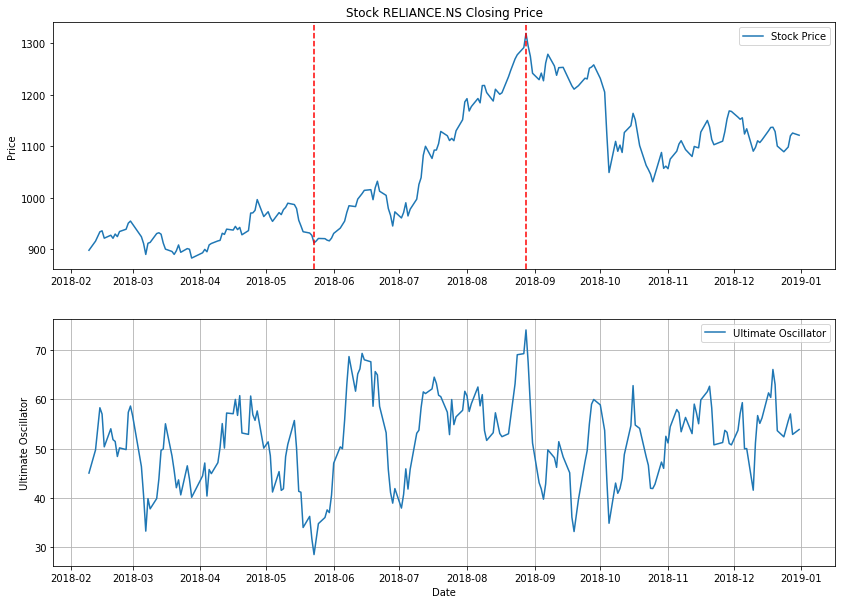

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot((df['Close']), label='Stock Price')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')
ax1.axvline(x = min_osc, color='red', linestyle='--')
ax1.axvline(x = max_osc, color='red', linestyle='--')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Ult Osc'], label='Ultimate Oscillator')
#ax2.axhline(y=70, color='red')
#ax2.axhline(y=50, color='black', linestyle='--')
#ax2.axhline(y=30, color='red')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Ultimate Oscillator')
ax2.set_xlabel('Date')